In [1]:
%matplotlib nbagg
%matplotlib inline
import MDAnalysis as mda
import MDAnalysis.analysis.leaflet
import matplotlib
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import nglview as nv

import warnings
warnings.filterwarnings('ignore')

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# no GM1

name = '_DPPC_DIPC_chol_352'

path_data = '/mnt/modelo-nfs/data/Julie/DPPC_DIPC_GM1/3_5_2/DIPC_DPPC_chol/'
path_res = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol/'
fgro = 'start_mb.gro'
fxtc = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1.xtc'

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# 5% GM1

name = '_DPPC_DIPC_chol_352_5GM1_sup'

path_data = '/mnt/modelo-nfs/data/Julie/DPPC_DIPC_GM1/3_5_2/DIPC_DPPC_chol_GM1_5/'
path_res = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_5/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_20micros_mb_fixed_t1_ref19999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_20micros_mb_fixed_t1.xtc'

In [48]:
# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# 10% GM1

name = '_DPPC_DIPC_chol_352_10GM1_sup'

path_data = '/mnt/modelo-nfs/data/Julie/DPPC_DIPC_GM1/3_5_2/DIPC_DPPC_chol_GM1_10/'
path_res = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_10/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_10_43nm_20micros_mb_fixed_t1_ref19999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_10_43nm_20micros_mb_fixed_t1.xtc'

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# 20% GM1

name = '_DPPC_DIPC_chol_352_20GM1'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_20/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_20_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_20_43nm_10ms_mb_fixed_t1.xtc'

In [49]:
u = mda.Universe( path_data+fgro, path_data+fxtc)

In [50]:
sel_all = u.select_atoms("all and resname DPPC")

for ts in u.trajectory:
    PO4 = u.select_atoms("name PO4 and resname DPPC") # and resname D*PC pour avoir juste les rouges

In [51]:
# visualize the bilayer and choose the frame to study

v= nv.show_mdanalysis(sel_all)
v.add_spacefill(sel_all, scale=2.0)
v

A Jupyter Widget

In [80]:
# Attention apparemment il y a un lipide qui dépasse dans la simus 3:5:2!
# contient 20000 frames

In [52]:
# select the atoms in the membrane and divide the bilayer into 2 leaflets selecting the species you want

sel_tot = "all and (name PO4 or name GM1)"


u.trajectory[2]
Lf = mda.analysis.leaflet.LeafletFinder(u, 'name PO4 or name GM1')
leaflet0 = Lf.groups(0)
leaflet1 = Lf.groups(1)

l0 = leaflet0.select_atoms(sel_tot).positions
l1 = leaflet1.select_atoms(sel_tot).positions
m_tot = u.select_atoms(sel_tot).positions

print('total number of lipids: %d' % len(m_tot))
print('number of lipids in the upper leaflet: %d + number of lipids in the lower leaflet:%d \n= %d' % (len(l0),len(l1),len(l0)+len(l1)))

if (len(m_tot) != len(l0)+len(l1) ):
    print('PROBLEM!')

total number of lipids: 5272
number of lipids in the upper leaflet: 2676 + number of lipids in the lower leaflet:2596 
= 5272


In [53]:
# TAKE THE LAST FRAME

u.trajectory[19999]

< Timestep 19999 with unit cell dimensions [428.47583 428.47583 209.67029  90.       90.       90.     ] >

Text(0.5,1,'Répartition des espèces')

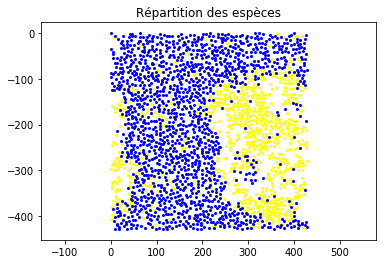

In [54]:
xmin=0
ymin=0

Lo = leaflet0.select_atoms("(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and name PO4 and resname DPPC").positions
Ld = leaflet0.select_atoms("(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and name PO4 and resname DIPC").positions
plt.scatter(Lo[:,1], -Lo[:,0], marker='o', c='yellow', s=4)
plt.scatter(Ld[:,1], -Ld[:,0], marker='o', c='b', s=4)

plt.axis('equal')
plt.title('Répartition des espèces',fontsize=12)

In [55]:
print(np.shape(Lo))
print(np.shape(Ld))

(810, 3)
(1566, 3)


In [56]:
# create a matrix for each phase with a 4th column that returns 1 if the phase is Lo and 0 if it's Ld

Lo2 = np.zeros((len(Lo),4))
Lo2[:,0] = Lo[:,0]
Lo2[:,1] = Lo[:,1]
Lo2[:,2] = Lo[:,2]
Lo2[:,3] = 1

Ld2 = np.zeros((len(Ld),4))
Ld2[:,0] = Ld[:,0]
Ld2[:,1] = Ld[:,1]
Ld2[:,2] = Ld[:,2]
Ld2[:,3] = 0

print(Lo2)
print(Ld2)

[[ 96.37000275 391.57000732  80.25000763   1.        ]
 [ 64.          58.27999878  46.31000137   1.        ]
 [121.05000305 361.94000244  89.45000458   1.        ]
 ...
 [207.55001831 303.62002563  99.1000061    1.        ]
 [193.20001221 405.16003418  96.87000275   1.        ]
 [407.70001221 352.1499939   74.9200058    1.        ]]
[[304.83001709 121.1000061   60.01000214   0.        ]
 [223.49000549  39.34000397  80.0900116    0.        ]
 [ 21.84000015 145.40000916  39.80000305   0.        ]
 ...
 [224.70001221  83.06999969  60.33000565   0.        ]
 [ 75.48000336 127.04000854  44.40000153   0.        ]
 [ 13.4100008  407.02001953  64.65000153   0.        ]]


In [57]:
# create a matrix combining the previous information for both leaflet on which one can perform the neighboring analysis

Mc=np.vstack((Lo2,Ld2))
print(Mc)

[[ 96.37000275 391.57000732  80.25000763   1.        ]
 [ 64.          58.27999878  46.31000137   1.        ]
 [121.05000305 361.94000244  89.45000458   1.        ]
 ...
 [224.70001221  83.06999969  60.33000565   0.        ]
 [ 75.48000336 127.04000854  44.40000153   0.        ]
 [ 13.4100008  407.02001953  64.65000153   0.        ]]


(2376, 4)


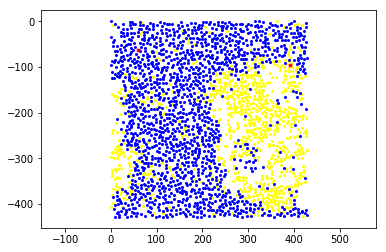

In [58]:
# test to check how is organized the matrix

print(np.shape(Mc))
f, (ax) = plt.subplots(1)

for i in range(len(Mc)):
    if Mc[i,3]==1:
        ax.scatter(Mc[i,1], -Mc[i,0], marker='o', c='yellow', s=4)
    else:
        ax.scatter(Mc[i,1], -Mc[i,0], marker='o', c='b', s=4)
plt.axis('equal')

ax.scatter(Mc[0,1], -Mc[0,0], marker='o', c='r', s=8)
ax.scatter(Mc[1,1], -Mc[1,0], marker='o', c='r', s=8)
# on voit que les points voisins dans la liste ne le sont pas dans le plan

Neighbors found within the radius d:
153
583
1375
1428
1523
1998
2051


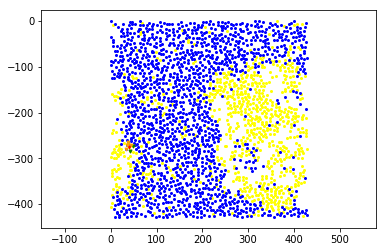

In [59]:
# check which neighbors are considered

d = 13 # cut-off distance to tune
print('Neighbors found within the radius d:')

i = 404 #28
xi = Mc[i,0]
yi = Mc[i,1]
zi = Mc[i,2]
spi = Mc[i,3]

f, (ax) = plt.subplots(1)

ax.scatter(Lo[:,1], -Lo[:,0], marker='o', c='yellow', s=4)
ax.scatter(Ld[:,1], -Ld[:,0], marker='o', c='b', s=4)

ax.scatter(Mc[i,1], -Mc[i,0], marker='v', c='red', s=8)
plt.axis('equal')

for j in range(len(Mc)):
    xj = Mc[j,0]
    yj = Mc[j,1]
    zj = Mc[j,2]
    spj = Mc[j,3]
    
    if (xj-xi)**2+(yj-yi)**2+(zj-zi)**2 <= d**2 and j!=i:
        print(j)
        ax.scatter(Mc[j,1], -Mc[j,0], marker='v', c='orange', s=8)
        if spj==spi :
            ax.scatter(Mc[j,1], -Mc[j,0], marker='v', c='green', s=8)
        
plt.savefig(path_res+'neighbors'+name+'.pdf', format='pdf',bbox_inches='tight')

In [60]:
d = 13 # distance à afiner en A
# diviser par le nombre de voisins trouvés pour uniformiser ?
cpt_neigh_tot = 0 # compte le nb de voisins
cpt_neigh_sp = 0 # compte le nb de voisins de la même espèce

for i in range(len(Mc)):
    xi = Mc[i,0]
    yi = Mc[i,1]
    zi = Mc[i,2]
    spi = Mc[i,3] #valeur de la case espèce

    for j in range(len(Mc)):
        xj = Mc[j,0]
        yj = Mc[j,1]
        zj = Mc[j,2]
        spj = Mc[j,3]

        if (xj-xi)**2+(yj-yi)**2+(zj-zi)**2 <= d**2 and j!=i:
            cpt_neigh_tot+=1
            if spj==spi :
                cpt_neigh_sp+=1
                
print(cpt_neigh_tot)
print(cpt_neigh_tot/len(Mc))
print(cpt_neigh_sp)
print(cpt_neigh_sp/len(Mc))

13390
5.635521885521886
11140
4.688552188552189


In [61]:
time_simu = 20 # microseconds
nb_frames_simu = 20000

In [62]:
# compute the mean number of neighbors of the same species through time

tmes = 100 # frequency of the measure

time = []
neigh_tot = []
neigh_sp = []

Lf = mda.analysis.leaflet.LeafletFinder(u, "name PO4")
leaflet0 = Lf.groups(0)
leaflet1 = Lf.groups(1)

for ts in u.trajectory:
     if (ts.frame%tmes == 0):
            print(ts.frame)
            time.append(ts.frame/ (nb_frames_simu/time_simu))
            
            xmin=0
            ymin=0
            Lo = leaflet0.select_atoms("name PO4 and resname DPPC").positions
            Ld = leaflet0.select_atoms("name PO4 and resname DIPC").positions

            Lo2 = np.zeros((len(Lo),4))
            Lo2[:,0] = Lo[:,0]
            Lo2[:,1] = Lo[:,1]
            Lo2[:,2] = Lo[:,2]
            Lo2[:,3] = 1

            Ld2 = np.zeros((len(Ld),4))
            Ld2[:,0] = Ld[:,0]
            Ld2[:,1] = Ld[:,1]
            Ld2[:,2] = Ld[:,2]
            Ld2[:,3] = 0
            
            Mc=np.vstack((Lo2,Ld2))
            
            d = 13 # distance à afiner 
            # diviser par le nombre de voisins trouvés pour uniformiser ?
            cpt_neigh_tot = 0 # compte le nb de voisins
            cpt_neigh_sp = 0 # compte le nb de voisins de la même espèce

            for i in range(len(Mc)):
                xi = Mc[i,0]
                yi = Mc[i,1]
                zi = Mc[i,2]
                spi = Mc[i,3] #valeur de la case espèce

                for j in range(len(Mc)):
                    xj = Mc[j,0]
                    yj = Mc[j,1]
                    zj = Mc[j,2]
                    spj = Mc[j,3]

                    if (xj-xi)**2+(yj-yi)**2+(zj-zi)**2 <= d**2 and j!=i :
                        cpt_neigh_tot+=1
                        if spj==spi :
                            cpt_neigh_sp+=1
                            
            neigh_tot.append(cpt_neigh_tot/len(Mc))
            neigh_sp.append(cpt_neigh_sp/len(Mc))
              

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [63]:
print(time)
print(neigh_tot)
print(neigh_sp)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0, 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13.0, 13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 1

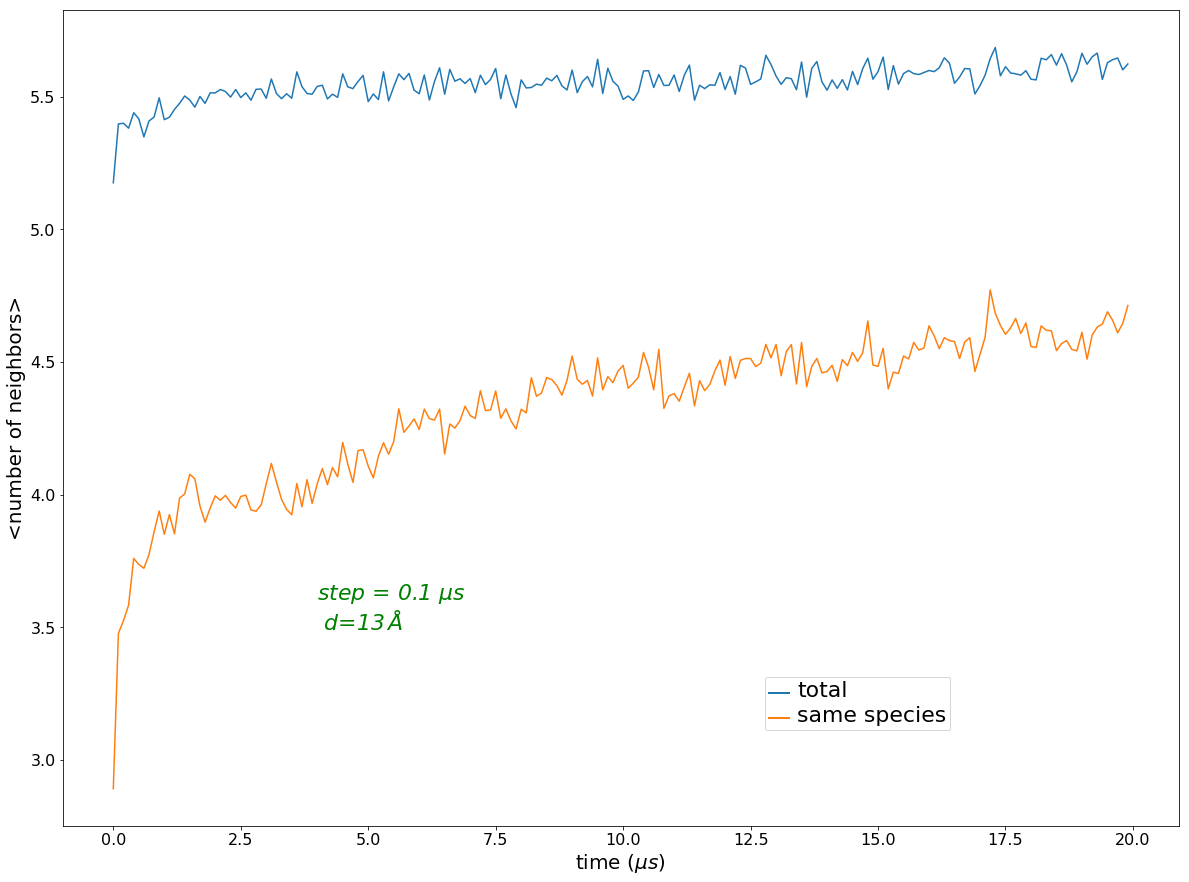

In [64]:
# plot of the mean number of neighbors of the same species and the total mean number of neighbors through time
fig, ax = plt.subplots(figsize=(20, 15))

ax.plot(time,neigh_tot,label = 'total')
ax.plot(time,neigh_sp, label = 'same species')

plt.xlabel('time ($\mu s$)',fontsize=20)
plt.ylabel('<number of neighbors>',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.annotate('step = %.1lf $\mu s$\n d=%d$\, \AA$' % (tmes/ (nb_frames_simu/time_simu), d ), color='g', fontsize=22, style='italic', xy=(4,3.5), xytext=(4,3.5))


legend = ax.legend(loc='right', bbox_to_anchor=(0.8, 0.15))
# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
#frame.set_facecolor('0.90')
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize(22)
for label in legend.get_lines():
    label.set_linewidth(2)  # the legend line width

plt.savefig(path_res+'neigh_time'+name+'.pdf', format='pdf',bbox_inches='tight')

In [65]:
tx = np.array(time)
ny = np.array(neigh_sp)

[1.01351151 6.46203953 3.62991106]


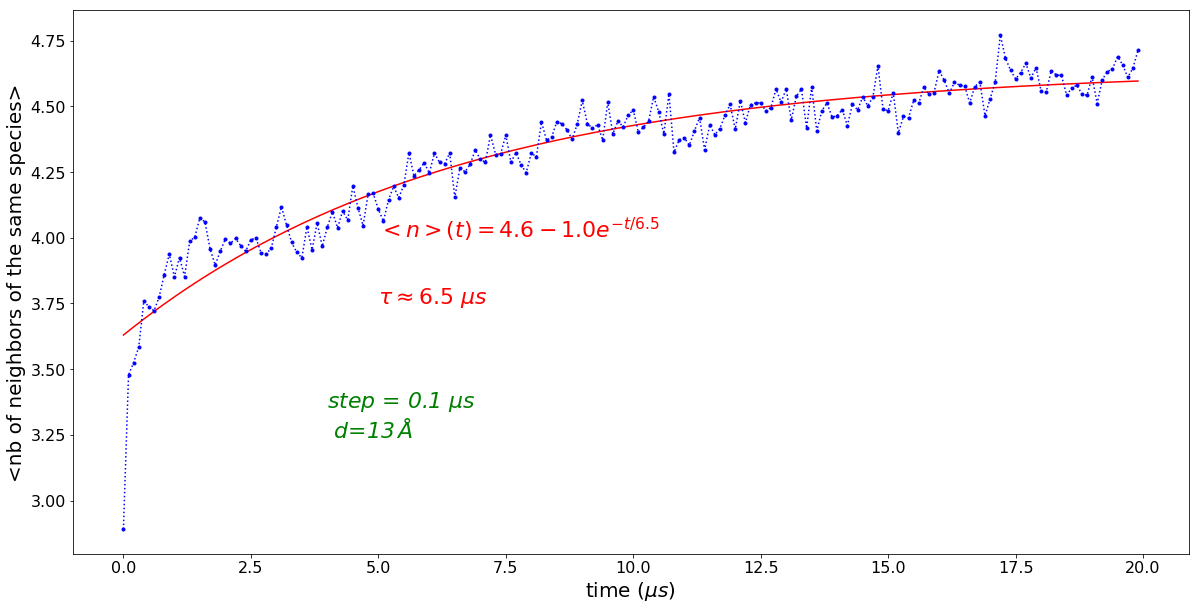

In [66]:
#------------------Fit pour une simulation----------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

def fitFunc(t,A,tau,B):
        return A*(1-np.exp(-t/tau)) + B

start = [10.0,1.0,2.0]
#param_bounds=([0,0,0],[100,100,10000])

param, evol = curve_fit(fitFunc, tx, ny, p0 = start) #bounds=param_bounds
print(param)


ax.plot(tx,fitFunc(tx, *param), 'red')
ax.plot(tx, ny, ':b.')

plt.xlabel('time ($\mu s$)',fontsize=20)
plt.xticks(fontsize=16)
plt.ylabel('<nb of neighbors of the same species>',fontsize=20)
plt.yticks(fontsize=16)
plt.annotate('$ <n>(t)= %.1f- %.1fe^{-t/ %.1f } $' % (param[0]+param[2],param[0],param[1]), color='red', fontsize=22, style='italic',xy=(5,4), xytext=(5, 4))
plt.annotate('$ \\tau \\approx %.1f$ $\mu s$' % param[1], color='red', fontsize=22, style='italic',xy=(5,4), xytext=(5, 3.75))
plt.annotate('step = %.1lf $\mu s$\n d=%d$\, \AA$' % (tmes/ (nb_frames_simu/time_simu), d ), color='g', fontsize=22, style='italic', xy=(4,3.5), xytext=(4,3.25))

plt.savefig(path_res+'fit_neigh_time'+name+'.pdf', format='pdf',bbox_inches='tight')